In [59]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [108]:
analysis = scripts.Analysis()

In [109]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.85_.7_.6_.45',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [110]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.85_.7_.6_.45',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [111]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [112]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [113]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [114]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [115]:
fig.display_hrefanchor()

In [116]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [117]:
table_dgdgs.display_hrefanchor()

In [118]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [119]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

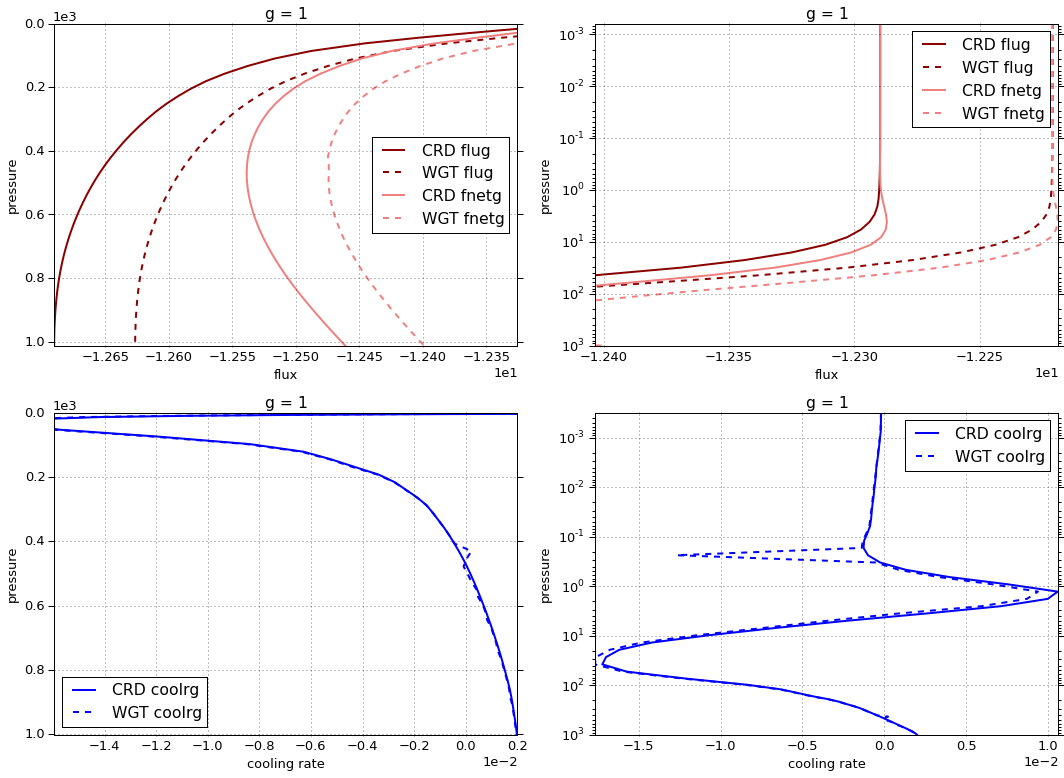

# Figure: flux, cooling rate. g-group 2

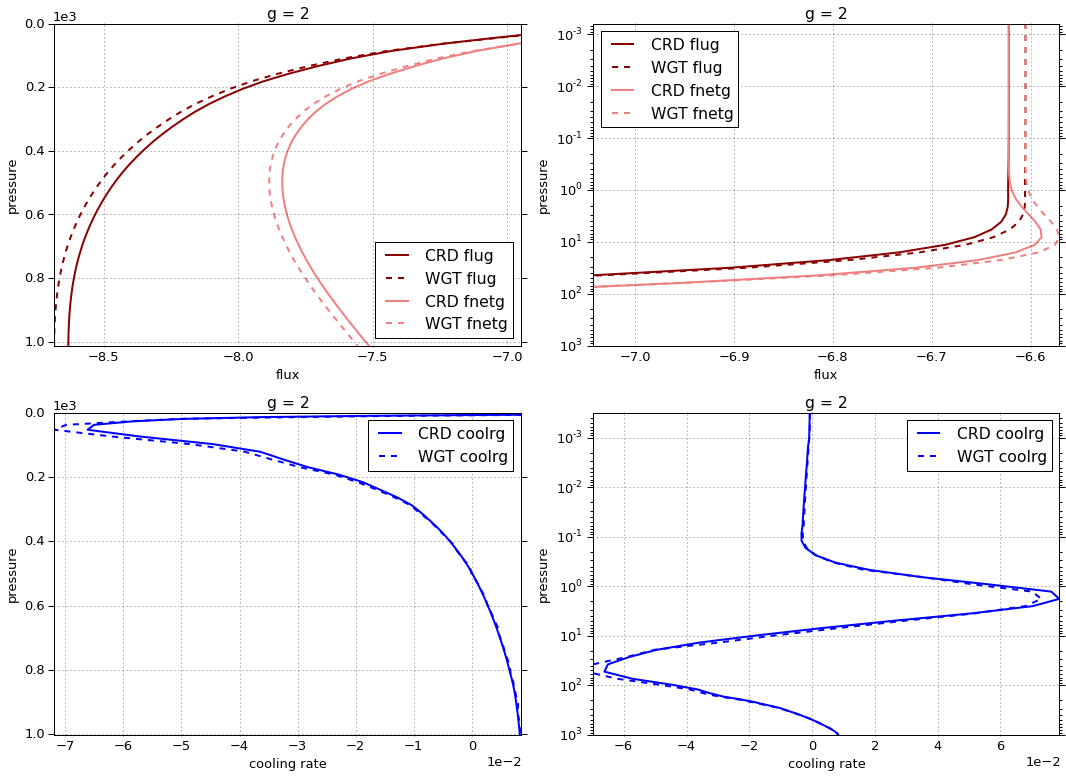

# Figure: flux, cooling rate. g-group 3

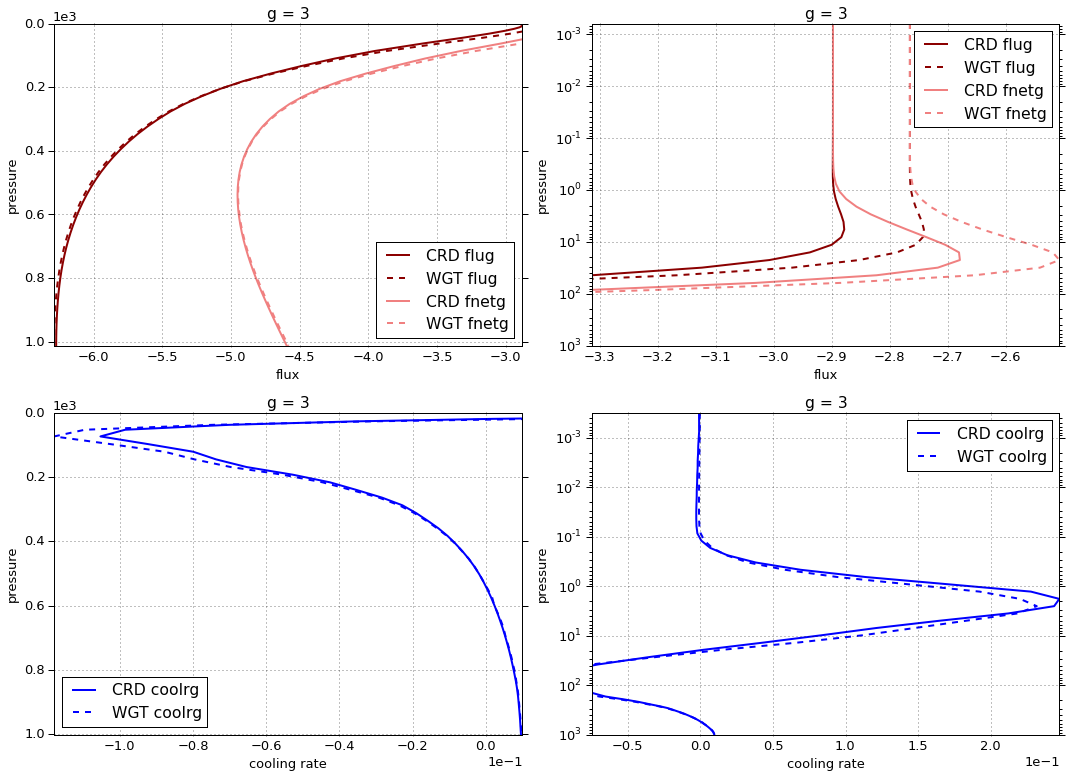

# Figure: flux, cooling rate. g-group 4

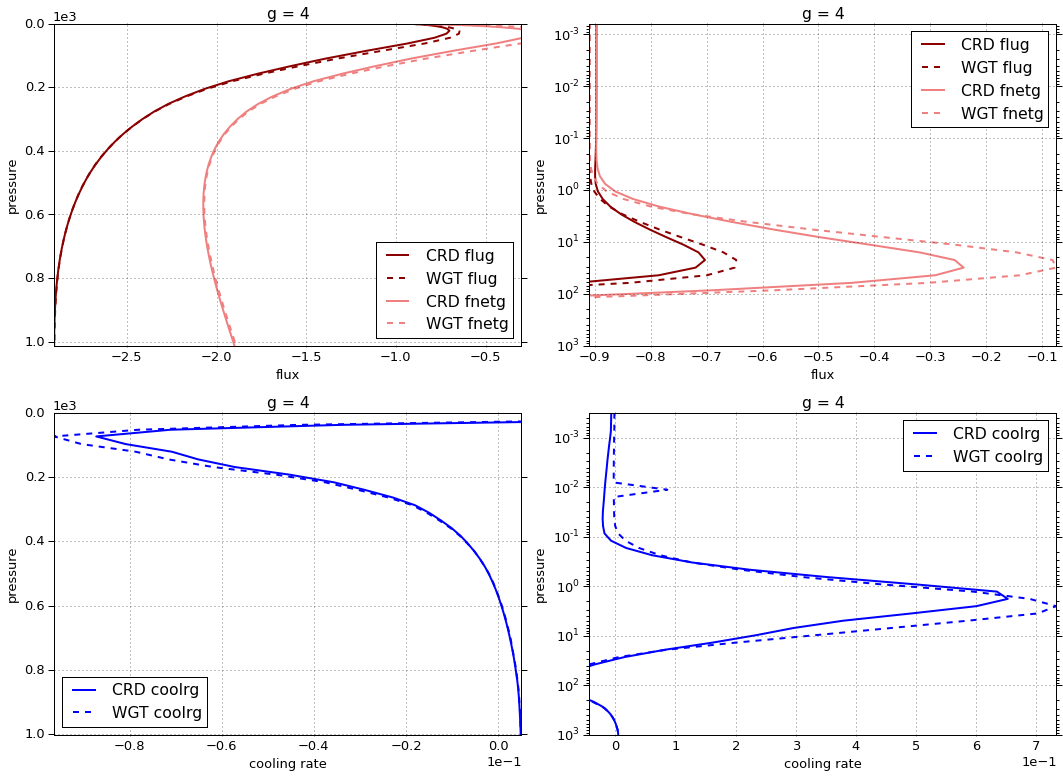

# Figure: flux, cooling rate. g-group 5

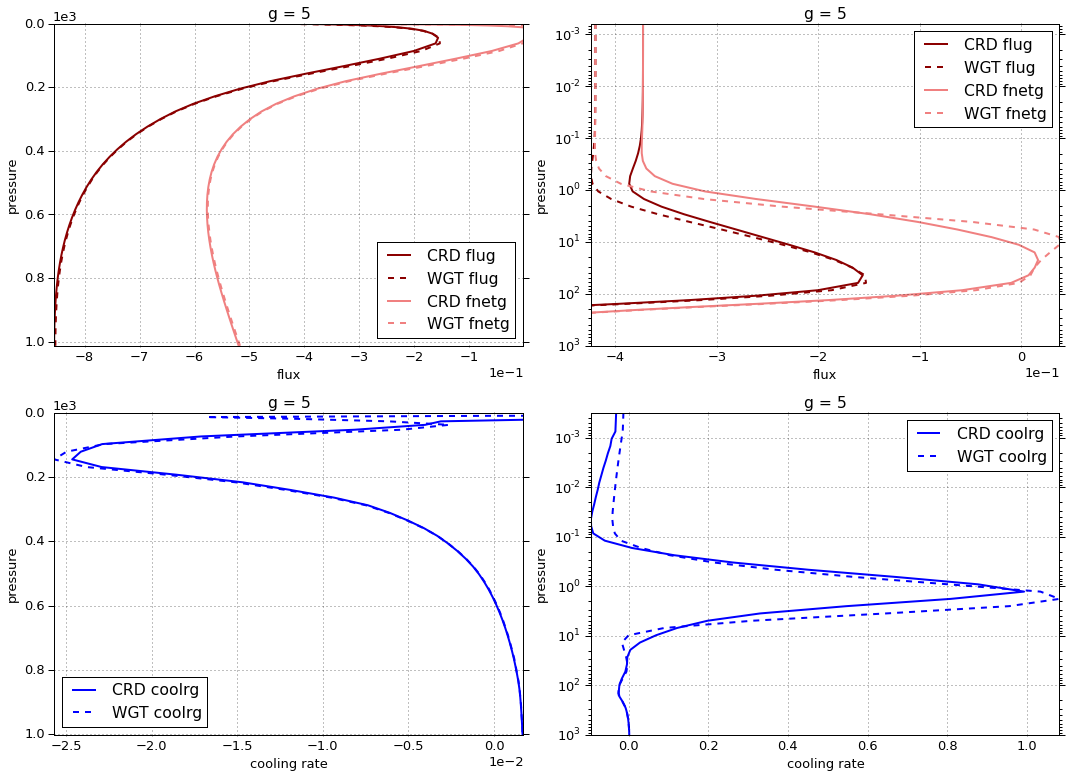

# Figure: flux, cooling rate. g-group total

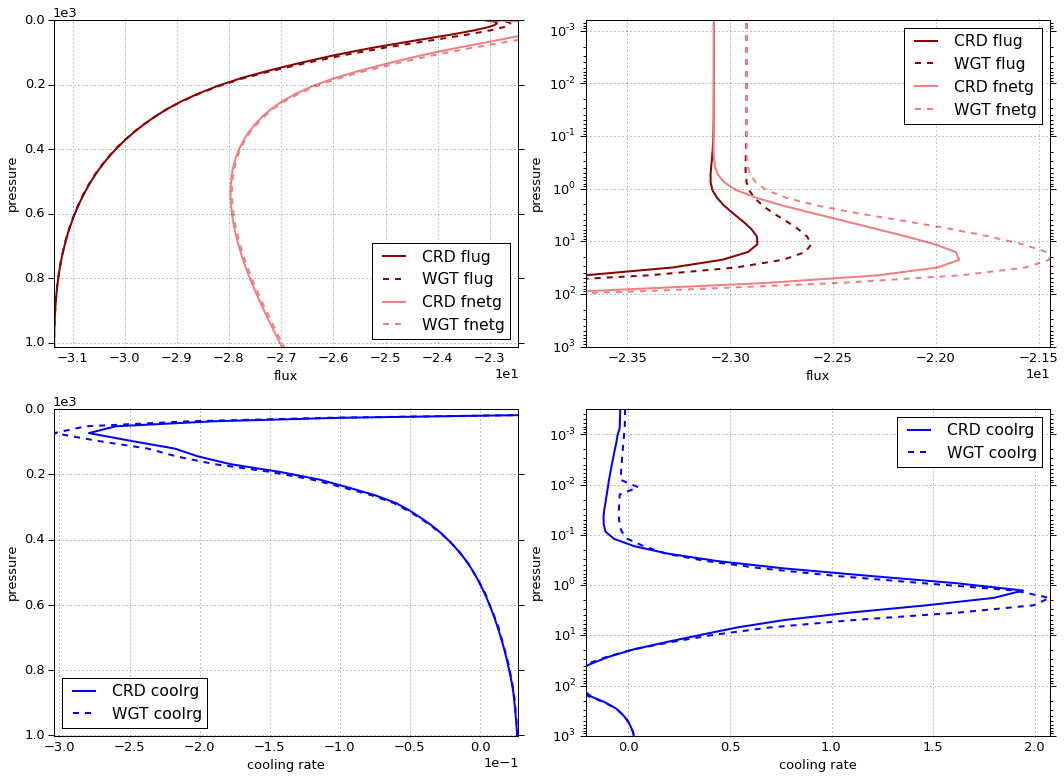

In [120]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [121]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.289739  0.000000 -12.289739
  1013     76    -12.690350  0.229315 -12.461035
2 0        1      -6.622397  0.000000  -6.622397
  1013     76     -8.631796  1.117563  -7.514233
3 0        1      -2.897908  0.000000  -2.897908
  1013     76     -6.271913  1.678100  -4.593813
4 0        1      -0.897029  0.000000  -0.897029
  1013     76     -2.904271  1.004754  -1.899516
5 0        1      -0.372800  0.000000  -0.372800
  1013     76     -0.855905  0.336264  -0.519640


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.220893  0.000000 -12.220893
  1013     76    -12.626583  0.227595 -12.398988
2 0        1      -6.605603  0.000000  -6.605603
  1013     76     -8.684669  1.128323  -7.556346
3 0        1      -2.765406  0.000000  -2.765406
  1013     76     -6.286592  1.705020  -4.581572
4 0        1      -0.909396  0.000000  -0.909396
  1013     76     -2.902718  1.012037  -1.890680
5 0        1      -0.419686  0.000000  -0.419686
  1013     76     -0.853674  0.336512  -0.517162


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.068846  0.000000  0.068846
  1013     76     0.063767 -0.001720  0.062047
2 0        1      0.016794  0.000000  0.016794
  1013     76    -0.052873  0.010759 -0.042114
3 0        1      0.132501  0.000000  0.132501
  1013     76    -0.014678  0.026919  0.012241
4 0        1     -0.012367  0.000000 -0.012367
  1013     76     0.001553  0.007283  0.008836
5 0        1     -0.046886  0.000000 -0.046886
  1013     76     0.002231  0.000248  0.002479

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000204
  1001.112500 75     0.001986
2 0.000312    1     -0.000749
  1001.112500 75     0.008276
3 0.000312    1     -0.000948
  1001.112500 75     0.009610
4 0.000312    1     -0.006621
  1001.112500 75     0.004910
5 0.000312    1     -0.031154
  1001.112500 75     0.001666


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000215
  1001.112500 75     0.001970
2 0.000312    1     -0.000691
  1001.112500 75     0.008405
3 0.000312    1     -0.000416
  1001.112500 75     0.009780
4 0.000312    1     -0.001476
  1001.112500 75     0.004952
5 0.000312    1     -0.012948
  1001.112500 75     0.001662


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000012
  1001.112500 75    -0.000016
2 0.000312    1      0.000058
  1001.112500 75     0.000129
3 0.000312    1      0.000532
  1001.112500 75     0.000171
4 0.000312    1      0.005145
  1001.112500 75     0.000042
5 0.000312    1      0.018206
  1001.112500 75    -0.000004

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.079874,0.000000,-23.079874
1013,76,-31.354235,4.365997,-26.988237



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.920984,0.000000,-22.920984
1013,76,-31.354235,4.409487,-26.944749



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.588892e-01,0.000000,0.158889
1013,76,-3.600000e-07,0.043489,0.043489


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.039675
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.015747
1001.112500,75,0.026769



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.023929
1001.112500,75,0.000321


In [122]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.411200,0.402707
2,0.270800,0.276986
3,0.198242,0.200502
4,0.092400,0.092578
5,0.027358,0.027227


In [123]:
writer = pd.ExcelWriter('results.xlsx')

In [124]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

crd                                 wgt                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.289739  0.000000e+00 -12.289739 -12.220893  0.000000e+00   
0.000624    -12.289739  3.250199e-09 -12.289739 -12.220893  3.172480e-09   
0.000876    -12.289739  4.738149e-09 -12.289739 -12.220893  4.624487e-09   
0.001229    -12.289739  7.326000e-09 -12.289739 -12.220893  7.148424e-09   
0.001723    -12.289739  1.171091e-08 -12.289739 -12.220893  1.142258e-08   
0.002417    -12.289739  1.897438e-08 -12.289739 -12.220893  1.849855e-08   
0.003391    -12.289739  3.080604e-08 -12.289739 -12.220894  3.001823e-08   
0.004757    -12.289739  4.982204e-08 -12.289739 -12.220894  4.852236e-08   
0.006672    -12.289739  8.005501e-08 -12.289739 -12.220894  7.792499e-08   
0.009359    -12.289740  1.277000e-07 -12.289739 -12.220894  1.242356e-07   
0.013128    -12.289740  2.022332e-07 -12.289740 -12.220894  1.966415e-07   
0.018415    -12.289740  3.181269e-07 -12.289740 -12.220895  3.091657e-07   
0.025830    -12.289741  4.973745e-07 -12.289741 -12.220896  4.831084e-07   
0.036232    -12.289743  7.734526e-07 -12.289742 -12.220897  7.508741e-07   
0.050823    -12.289744  1.200693e-06 -12.289743 -12.220899  1.165036e-06   
0.071291    -12.289747  1.916353e-06 -12.289745 -12.220902  1.857682e-06   
0.100000    -12.289752  3.427205e-06 -12.289749 -12.220907  3.313622e-06   
0.140271    -12.289762  7.054577e-06 -12.289755 -12.220917  6.789212e-06   
0.196760    -12.289779  1.555301e-05 -12.289763 -12.220934  1.489042e-05   
0.275997    -12.289808  3.489551e-05 -12.289773 -12.221072  3.324868e-05   
0.387100    -12.289854  7.796700e-05 -12.289776 -12.221119  7.398533e-05   
0.543100    -12.289925  1.722918e-04 -12.289752 -12.221192  1.629662e-04   
0.761700    -12.290024  3.737241e-04 -12.289650 -12.221296  3.526574e-04   
1.068500    -12.290162  7.860400e-04 -12.289376 -12.221445  7.407269e-04   
1.498800    -12.290387  1.550025e-03 -12.288837 -12.221688  1.461289e-03   
2.102400    -12.290879  2.753164e-03 -12.288126 -12.222207  2.601077e-03   
2.949000    -12.291939  4.527500e-03 -12.287411 -12.223304  4.293444e-03   
4.136600    -12.293963  6.916407e-03 -12.287046 -12.225479  6.593569e-03   
5.802500    -12.297380  9.887102e-03 -12.287493 -12.229051  9.485290e-03   
8.139200    -12.302878  1.354218e-02 -12.289336 -12.234700  1.308105e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.623653  9.417726e-02 -12.529476 -12.560930  9.440975e-02   
347.300000  -12.629744  9.732335e-02 -12.532420 -12.566983  9.751341e-02   
371.075000  -12.635352  1.006121e-01 -12.534740 -12.572548  1.007615e-01   
394.850000  -12.640542  1.040462e-01 -12.536495 -12.577690  1.041489e-01   
418.625000  -12.645386  1.076511e-01 -12.537735 -12.582483  1.077021e-01   
442.400000  -12.649880  1.113962e-01 -12.538484 -12.586924  1.127703e-01   
466.175000  -12.654023  1.152491e-01 -12.538774 -12.591013  1.169408e-01   
489.950000  -12.657820  1.191815e-01 -12.538638 -12.594755  1.204521e-01   
513.725000  -12.661320  1.232095e-01 -12.538111 -12.598201  1.241135e-01   
537.500000  -12.664568  1.273573e-01 -12.537210 -12.601394  1.279367e-01   
561.275000  -12.667568  1.316112e-01 -12.535957 -12.604342  1.320588e-01   
585.050000  -12.670342  1.359767e-01 -12.534366 -12.607064  1.361380e-01   
608.825000  -12.672903  1.404617e-01 -12.532441 -12.609574  1.405049e-01   
632.600000  -12.675253  1.450513e-01 -12.530201 -12.611875  1.449756e-01   
656.375000  -12.677401  1.497428e-01 -12.527658 -12.613977  1.494179e-01   
680.150000  -12.679356  1.545373e-01 -12.524818 -12.615887  1.541052e-01   
703.925000  -12.681118  1.594201e-01 -12.521698 -12.617607  1.588825e-01   
727.700000  -12.682695  1.643875e-01 -12.518308 -12.619145  1.637474e-01   
751.475000  -12.684095  1.694432e-01 -12.514652 -12.620510  1.68598

In [125]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.622397  0.000000e+00 -6.622397 -6.605603  0.000000e+00   
0.000624    -6.622398  1.858982e-08 -6.622398 -6.605603  1.663766e-08   
0.000876    -6.622398  2.710133e-08 -6.622398 -6.605604  2.426450e-08   
0.001229    -6.622398  4.190695e-08 -6.622398 -6.605604  3.752642e-08   
0.001723    -6.622398  6.699838e-08 -6.622398 -6.605604  5.999248e-08   
0.002417    -6.622398  1.085682e-07 -6.622398 -6.605604  9.719850e-08   
0.003391    -6.622398  1.762914e-07 -6.622398 -6.605604  1.577916e-07   
0.004757    -6.622399  2.851491e-07 -6.622398 -6.605604  2.551589e-07   
0.006672    -6.622399  4.582338e-07 -6.622399 -6.605605  4.099347e-07   
0.009359    -6.622400  7.310203e-07 -6.622399 -6.605606  6.538193e-07   
0.013128    -6.622401  1.157770e-06 -6.622400 -6.605607  1.035309e-06   
0.018415    -6.622404  1.821346e-06 -6.622402 -6.605609  1.628488e-06   
0.025830    -6.622407  2.847665e-06 -6.622404 -6.605612  2.545995e-06   
0.036232    -6.622412  4.428365e-06 -6.622408 -6.605616  3.959391e-06   
0.050823    -6.622420  6.874594e-06 -6.622413 -6.605623  6.147328e-06   
0.071291    -6.622431  1.097109e-05 -6.622420 -6.605633  9.808821e-06   
0.100000    -6.622451  1.959846e-05 -6.622432 -6.605651  1.749680e-05   
0.140271    -6.622488  4.017342e-05 -6.622448 -6.605683  3.575863e-05   
0.196760    -6.622549  8.786301e-05 -6.622462 -6.605737  7.795715e-05   
0.275997    -6.622646  1.948136e-04 -6.622451 -6.605820  1.724169e-04   
0.387100    -6.622784  4.285486e-04 -6.622355 -6.605938  3.787509e-04   
0.543100    -6.622951  9.289798e-04 -6.622022 -6.606077  8.210035e-04   
0.761700    -6.623093  1.969827e-03 -6.621124 -6.606091  1.743640e-03   
1.068500    -6.623129  4.048124e-03 -6.619081 -6.606082  3.597262e-03   
1.498800    -6.623062  7.865268e-03 -6.615197 -6.605955  7.043369e-03   
2.102400    -6.623462  1.389719e-02 -6.609565 -6.606290  1.260154e-02   
2.949000    -6.625332  2.281063e-02 -6.602522 -6.607931  2.104520e-02   
4.136600    -6.630188  3.478583e-02 -6.595402 -6.612371  3.276413e-02   
5.802500    -6.639852  4.960200e-02 -6.590250 -6.621504  4.774683e-02   
8.139200    -6.657059  6.774197e-02 -6.589317 -6.637924  6.656909e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.244718  4.799408e-01 -7.764777 -8.298346  4.857139e-01   
347.300000  -8.282586  4.974846e-01 -7.785101 -8.336742  5.036520e-01   
371.075000  -8.317090  5.156405e-01 -7.801450 -8.371594  5.216002e-01   
394.850000  -8.348677  5.344078e-01 -7.814269 -8.403427  5.403575e-01   
418.625000  -8.377856  5.538726e-01 -7.823983 -8.432816  5.603687e-01   
442.400000  -8.404654  5.738459e-01 -7.830808 -8.459657  5.800777e-01   
466.175000  -8.429120  5.941450e-01 -7.834975 -8.484210  6.003263e-01   
489.950000  -8.451332  6.145955e-01 -7.836736 -8.506341  6.214401e-01   
513.725000  -8.471626  6.352878e-01 -7.836339 -8.526618  6.416520e-01   
537.500000  -8.490295  6.563354e-01 -7.833960 -8.545210  6.626182e-01   
561.275000  -8.507404  6.776581e-01 -7.829746 -8.562204  6.840353e-01   
585.050000  -8.523094  6.992977e-01 -7.823796 -8.577765  7.059629e-01   
608.825000  -8.537467  7.212575e-01 -7.816209 -8.592027  7.277489e-01   
632.600000  -8.550557  7.434730e-01 -7.807084 -8.604952  7.500487e-01   
656.375000  -8.562436  7.659320e-01 -7.796505 -8.616695  7.726943e-01   
680.150000  -8.573166  7.886322e-01 -7.784534 -8.627248  7.958918e-01   
703.925000  -8.582775  8.114972e-01 -7.771278 -8.636728  8.187137e-01   
727.700000  -8.591316  8.345148e-01 -7.756801 -8.645116  8.418418e-01   
751.475000  -8.598849  8.576985e-01 -7.741151 -8.652516  8.651344e-01   
775.250000  -8.605413  8.810126e-01 -7.724401 -8.658951  8.886955e-01   
799.025000  -8.611048  9.043857e-01 -7.706663 -8.664455  9.126838e-01   
822

In [126]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.897908  0.000000e+00 -2.897908 -2.765406  0.000000e+00   
0.000624    -2.897908  4.470926e-08 -2.897908 -2.765406  3.072850e-08   
0.000876    -2.897908  6.519100e-08 -2.897908 -2.765406  4.483628e-08   
0.001229    -2.897908  1.008625e-07 -2.897908 -2.765406  6.941655e-08   
0.001723    -2.897908  1.613900e-07 -2.897908 -2.765406  1.111444e-07   
0.002417    -2.897908  2.617880e-07 -2.897908 -2.765406  1.803973e-07   
0.003391    -2.897909  4.255424e-07 -2.897908 -2.765407  2.934241e-07   
0.004757    -2.897909  6.890614e-07 -2.897908 -2.765407  4.754447e-07   
0.006672    -2.897910  1.108530e-06 -2.897909 -2.765408  7.654347e-07   
0.009359    -2.897912  1.770359e-06 -2.897910 -2.765408  1.223439e-06   
0.013128    -2.897914  2.806867e-06 -2.897911 -2.765409  1.941597e-06   
0.018415    -2.897917  4.420354e-06 -2.897912 -2.765411  3.061135e-06   
0.025830    -2.897922  6.918603e-06 -2.897915 -2.765414  4.797593e-06   
0.036232    -2.897929  1.077064e-05 -2.897918 -2.765418  7.480691e-06   
0.050823    -2.897940  1.673863e-05 -2.897923 -2.765423  1.164862e-05   
0.071291    -2.897957  2.676011e-05 -2.897930 -2.765432  1.867052e-05   
0.100000    -2.897985  4.798348e-05 -2.897937 -2.765446  3.360068e-05   
0.140271    -2.898033  9.879621e-05 -2.897934 -2.765469  6.952257e-05   
0.196760    -2.898105  2.165012e-04 -2.897889 -2.765498  1.532553e-04   
0.275997    -2.898194  4.791272e-04 -2.897715 -2.765520  3.415738e-04   
0.387100    -2.898261  1.047549e-03 -2.897213 -2.765499  7.533919e-04   
0.543100    -2.898185  2.246861e-03 -2.895938 -2.765304  1.634304e-03   
0.761700    -2.897678  4.692432e-03 -2.892985 -2.764683  3.463653e-03   
1.068500    -2.896229  9.467084e-03 -2.886762 -2.763127  7.127016e-03   
1.498800    -2.893245  1.809225e-02 -2.875153 -2.760194  1.399934e-02   
2.102400    -2.888989  3.152435e-02 -2.857465 -2.755776  2.533232e-02   
2.949000    -2.884004  5.098986e-02 -2.833015 -2.750212  4.301538e-02   
4.136600    -2.879764  7.659918e-02 -2.803165 -2.744687  6.823841e-02   
5.802500    -2.878539  1.079261e-01 -2.770613 -2.741339  1.010542e-01   
8.139200    -2.883495  1.464688e-01 -2.737027 -2.743126  1.437444e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.607790  8.371556e-01 -4.770635 -5.623258  8.590453e-01   
347.300000  -5.679890  8.643657e-01 -4.815524 -5.696366  8.861521e-01   
371.075000  -5.744383  8.922661e-01 -4.852117 -5.761558  9.137553e-01   
394.850000  -5.802381  9.207748e-01 -4.881606 -5.819966  9.421515e-01   
418.625000  -5.855052  9.499488e-01 -4.905103 -5.872910  9.715421e-01   
442.400000  -5.902652  9.795077e-01 -4.923144 -5.920681  1.000995e+00   
466.175000  -5.945449  1.009123e+00 -4.936326 -5.963368  1.030614e+00   
489.950000  -5.983741  1.038550e+00 -4.945191 -6.001659  1.060103e+00   
513.725000  -6.018243  1.067946e+00 -4.950297 -6.036053  1.089494e+00   
537.500000  -6.049563  1.097454e+00 -4.952109 -6.067238  1.118955e+00   
561.275000  -6.077906  1.126963e+00 -4.950943 -6.095383  1.148709e+00   
585.050000  -6.103589  1.156567e+00 -4.947023 -6.120817  1.178950e+00   
608.825000  -6.126850  1.186241e+00 -4.940610 -6.143849  1.208322e+00   
632.600000  -6.147807  1.215917e+00 -4.931891 -6.164590  1.237968e+00   
656.375000  -6.166631  1.245577e+00 -4.921054 -6.183217  1.267981e+00   
680.150000  -6.183466  1.275259e+00 -4.908208 -6.199808  1.298127e+00   
703.925000  -6.198401  1.304879e+00 -4.893522 -6.214509  1.327787e+00   
727.700000  -6.211557  1.334400e+00 -4.877156 -6.227458  1.357454e+00   
751.475000  -6.223058  1.363863e+00 -4.859195 -6.238740  1.387129e+00   
775.250000  -6.232996  1.393211e+00 -4.839785 -6.248507  1.416782e+00   
799.025000  -6.241460  1.422401e+00 -4.819058 -6.256793  1.446263e+00   
822

In [127]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.897029  0.000000e+00 -0.897029 -0.909396  0.000000e+00   
0.000624    -0.897030  2.627052e-07 -0.897030 -0.909396  1.564737e-07   
0.000876    -0.897030  3.827738e-07 -0.897030 -0.909396  2.281615e-07   
0.001229    -0.897031  5.908610e-07 -0.897030 -0.909397  3.524363e-07   
0.001723    -0.897032  9.421137e-07 -0.897031 -0.909397  5.622824e-07   
0.002417    -0.897033  1.521711e-06 -0.897032 -0.909397  9.086844e-07   
0.003391    -0.897036  2.462122e-06 -0.897033 -0.909398  1.471004e-06   
0.004757    -0.897040  3.967491e-06 -0.897036 -0.909400  2.371682e-06   
0.006672    -0.897046  6.350972e-06 -0.897039 -0.909402  3.798809e-06   
0.009359    -0.897055  1.009120e-05 -0.897045 -0.909405  6.040409e-06   
0.013128    -0.897068  1.591634e-05 -0.897052 -0.909370  9.535743e-06   
0.018415    -0.897089  2.493195e-05 -0.897064 -0.909376  1.495387e-05   
0.025830    -0.897120  3.880693e-05 -0.897081 -0.909387  2.330919e-05   
0.036232    -0.897167  6.006218e-05 -0.897107 -0.909402  3.614284e-05   
0.050823    -0.897236  9.275093e-05 -0.897143 -0.909425  5.594932e-05   
0.071291    -0.897339  1.466344e-04 -0.897192 -0.909458  8.874661e-05   
0.100000    -0.897509  2.556430e-04 -0.897253 -0.909508  1.554939e-04   
0.140271    -0.897788  5.003714e-04 -0.897287 -0.909578  3.066493e-04   
0.196760    -0.898197  1.029925e-03 -0.897167 -0.909647  6.380747e-04   
0.275997    -0.898723  2.129761e-03 -0.896593 -0.909647  1.339612e-03   
0.387100    -0.899245  4.334849e-03 -0.894910 -0.909420  2.784191e-03   
0.543100    -0.899390  8.621447e-03 -0.890769 -0.908467  5.694695e-03   
0.761700    -0.898273  1.661692e-02 -0.881657 -0.906112  1.138795e-02   
1.068500    -0.894390  3.085215e-02 -0.863538 -0.900892  2.222576e-02   
1.498800    -0.885672  5.447867e-02 -0.831194 -0.890477  4.212685e-02   
2.102400    -0.872011  8.747830e-02 -0.784533 -0.873993  7.490290e-02   
2.949000    -0.852905  1.285901e-01 -0.724314 -0.850158  1.245749e-01   
4.136600    -0.828988  1.739438e-01 -0.655044 -0.819079  1.923205e-01   
5.802500    -0.801755  2.214992e-01 -0.580256 -0.784238  2.730994e-01   
8.139200    -0.772094  2.738966e-01 -0.498197 -0.746028  3.619128e-01   
...               ...           ...       ...       ...           ...   
323.525000  -2.469657  5.450719e-01 -1.924585 -2.469292  5.516805e-01   
347.300000  -2.520939  5.615341e-01 -1.959405 -2.521260  5.678156e-01   
371.075000  -2.566002  5.782523e-01 -1.987749 -2.566736  5.843166e-01   
394.850000  -2.605861  5.951618e-01 -2.010699 -2.606801  6.010383e-01   
418.625000  -2.641518  6.122935e-01 -2.029225 -2.642625  6.180776e-01   
442.400000  -2.673299  6.294589e-01 -2.043840 -2.674387  6.352952e-01   
466.175000  -2.701509  6.465008e-01 -2.055009 -2.702522  6.522493e-01   
489.950000  -2.726453  6.632813e-01 -2.063171 -2.727387  6.689536e-01   
513.725000  -2.748682  6.798847e-01 -2.068798 -2.749490  6.855625e-01   
537.500000  -2.768655  6.964191e-01 -2.072236 -2.769303  7.021472e-01   
561.275000  -2.786562  7.128355e-01 -2.073726 -2.787027  7.185658e-01   
585.050000  -2.802646  7.291725e-01 -2.073473 -2.802928  7.349078e-01   
608.825000  -2.817096  7.454531e-01 -2.071643 -2.817210  7.512531e-01   
632.600000  -2.830017  7.616342e-01 -2.068382 -2.829925  7.675232e-01   
656.375000  -2.841540  7.777289e-01 -2.063811 -2.841278  7.836918e-01   
680.150000  -2.851778  7.937424e-01 -2.058036 -2.851339  7.997510e-01   
703.925000  -2.860805  8.096380e-01 -2.051167 -2.860225  8.158912e-01   
727.700000  -2.868710  8.254164e-01 -2.043294 -2.867978  8.317572e-01   
751.475000  -2.875583  8.410988e-01 -2.034484 -2.874700  8.473996e-01   
775.250000  -2.881492  8.566683e-01 -2.024824 -2.880480  8.630179e-01   
799.025000  -2.886499  8.720868e-01 -2.014412 -2.885378  8.785279e-01   
822

In [128]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

crd                           wgt                        
                 flug      fldg     fnetg      flug          fldg     fnetg
pressure                                                                   
0.000000    -0.372800  0.000000 -0.372800 -0.419686  0.000000e+00 -0.419686
0.000624    -0.372804  0.000001 -0.372803 -0.419687  5.011700e-07 -0.419687
0.000876    -0.372805  0.000002 -0.372804 -0.419688  7.344179e-07 -0.419687
0.001229    -0.372808  0.000002 -0.372805 -0.419689  1.137861e-06 -0.419688
0.001723    -0.372812  0.000004 -0.372808 -0.419691  1.817458e-06 -0.419689
0.002417    -0.372819  0.000006 -0.372812 -0.419694  2.936683e-06 -0.419691
0.003391    -0.372829  0.000010 -0.372819 -0.419699  4.749512e-06 -0.419694
0.004757    -0.372846  0.000017 -0.372829 -0.419706  7.647109e-06 -0.419698
0.006672    -0.372871  0.000026 -0.372845 -0.419718  1.222949e-05 -0.419705
0.009359    -0.372910  0.000042 -0.372868 -0.419735  1.941432e-05 -0.419716
0.013128    -0.372968  0.000065 -0.372903 -0.419761  3.059967e-05 -0.419731
0.018415    -0.373056  0.000102 -0.372954 -0.419802  4.791316e-05 -0.419754
0.025830    -0.373188  0.000158 -0.373030 -0.419862  7.457801e-05 -0.419787
0.036232    -0.373385  0.000243 -0.373142 -0.419952  1.154869e-04 -0.419836
0.050823    -0.373678  0.000373 -0.373305 -0.420086  1.785393e-04 -0.419907
0.071291    -0.374116  0.000582 -0.373533 -0.420284  2.820964e-04 -0.420002
0.100000    -0.374825  0.000990 -0.373835 -0.420606  4.875160e-04 -0.420119
0.140271    -0.375976  0.001856 -0.374119 -0.421146  9.355801e-04 -0.420211
0.196760    -0.377680  0.003615 -0.374064 -0.421881  1.879758e-03 -0.420001
0.275997    -0.380002  0.007012 -0.372990 -0.422824  3.795252e-03 -0.419029
0.387100    -0.382818  0.013275 -0.369543 -0.423771  7.557275e-03 -0.416213
0.543100    -0.385509  0.024319 -0.361190 -0.424133  1.475519e-02 -0.409378
0.761700    -0.386433  0.042690 -0.343743 -0.422595  2.795536e-02 -0.394640
1.068500    -0.383005  0.071144 -0.311860 -0.416923  5.144307e-02 -0.365480
1.498800    -0.371832  0.110573 -0.261259 -0.404165  9.138314e-02 -0.312782
2.102400    -0.354589  0.151152 -0.203438 -0.384436  1.489652e-01 -0.235471
2.949000    -0.332322  0.183734 -0.148588 -0.357859  2.181917e-01 -0.139667
4.136600    -0.307082  0.204946 -0.102136 -0.327003  2.782478e-01 -0.048756
5.802500    -0.280973  0.218034 -0.062939 -0.295365  3.080395e-01  0.012674
8.139200    -0.254886  0.225618 -0.029268 -0.264624  3.020644e-01  0.037440
...               ...       ...       ...       ...           ...       ...
323.525000  -0.685715  0.169856 -0.515859 -0.684371  1.699375e-01 -0.514434
347.300000  -0.706524  0.176514 -0.530010 -0.705300  1.766098e-01 -0.528690
371.075000  -0.724679  0.183161 -0.541518 -0.723521  1.832567e-01 -0.540264
394.850000  -0.740629  0.189783 -0.550846 -0.739479  1.899011e-01 -0.549578
418.625000  -0.754804  0.196407 -0.558397 -0.753657  1.965335e-01 -0.557123
442.400000  -0.767362  0.202968 -0.564394 -0.766178  2.031108e-01 -0.563067
466.175000  -0.778446  0.209414 -0.569032 -0.777196  2.095522e-01 -0.567644
489.950000  -0.788193  0.215701 -0.572493 -0.786890  2.158502e-01 -0.571040
513.725000  -0.796836  0.221870 -0.574966 -0.795468  2.220346e-01 -0.573433
537.500000  -0.804564  0.227967 -0.576598 -0.803124  2.281385e-01 -0.574986
561.275000  -0.811461  0.233977 -0.577484 -0.809944  2.341564e-01 -0.575787
585.050000  -0.817630  0.239920 -0.577710 -0.816040  2.401057e-01 -0.575934
608.825000  -0.823151  0.245807 -0.577344 -0.821498  2.460029e-01 -0.575495
632.600000  -0.828069  0.251628 -0.576440 -0.826354  2.518397e-01 -0.574515
656.375000  -0.832439  0.257388 -0.575051 -0.830658  2.576058e-01 -0.573052
680.150000  -0.836310  0.263092 -0.573218 -0.834463  2.632968e-01 -0.571167
703.925000  -0.839711  0.268728 -0.570984 -0.837808  2.689380e-01 -0.568870
727.700000  -0.842681  0.274299 -0.568382 -0.840725  2.745083e-01 -0.566217
751.475000  -0.845256  0.279816 -0.565440 -0.843254  2.800242e-01 

In [129]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000204,-0.000215,-1.168119e-05
0.000750,-0.000228,-0.000241,-1.354152e-05
0.001052,-0.000277,-0.000293,-1.648418e-05
0.001476,-0.000326,-0.000345,-1.946712e-05
0.002070,-0.000375,-0.000397,-2.247766e-05
0.002904,-0.000435,-0.000449,-1.357560e-05
0.004074,-0.000501,-0.000501,-2.099100e-07
0.005714,-0.000521,-0.000553,-3.171114e-05


In [130]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000749,-0.000691,0.000058
0.000750,-0.000874,-0.000773,0.000101
0.001052,-0.000959,-0.000937,0.000022
0.001476,-0.001268,-0.001098,0.000170
0.002070,-0.001450,-0.001257,0.000193
0.002904,-0.001595,-0.001415,0.000180
0.004074,-0.001774,-0.001571,0.000204
0.005714,-0.001982,-0.001724,0.000258


In [131]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000948,-0.000416,0.000532
0.000750,-0.000880,-0.000460,0.000420
0.001052,-0.001203,-0.000548,0.000655
0.001476,-0.001502,-0.000626,0.000876
0.002070,-0.001619,-0.000698,0.000922
0.002904,-0.001895,-0.000762,0.001133
0.004074,-0.001923,-0.000820,0.001104
0.005714,-0.002187,-0.000869,0.001318


In [132]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.006621,-0.001476,5.145348e-03
0.000750,-0.007337,-0.001610,5.727038e-03
0.001052,-0.008749,-0.001884,6.864563e-03
0.001476,-0.010343,-0.002102,8.241304e-03
0.002070,-0.011720,-0.002279,9.440963e-03
0.002904,-0.013070,-0.002417,1.065370e-02
0.004074,-0.014214,-0.002513,1.170139e-02
0.005714,-0.015432,-0.002566,1.286564e-02


In [133]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.031154,-0.012948,0.018206
0.000750,-0.033075,-0.014641,0.018434
0.001052,-0.042512,-0.017557,0.024956
0.001476,-0.045790,-0.020301,0.025489
0.002070,-0.052002,-0.022927,0.029075
0.002904,-0.057215,-0.025444,0.031771
0.004074,-0.063137,-0.027845,0.035292
0.005714,-0.068255,-0.030130,0.038124


In [134]:
writer.save()

In [135]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [194]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
!ls

debug.xlsx  debug_irf.xlsx  results.ipynb  results.xlsx


In [159]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/o3/band05_wn_980_1100/P_50_T_250/min_1e-20_max_5e-18_ng_5/wgt_1_.85_.7_.6_.45/midlatitude_summer
